# Exploring Ensemble Regression 

*   Import GBP_USD.csv
*   Taking the first 7 days as x and the 8th day as y. 
*   Outlier Detection tool introduced
*   Linear Regression, Support Vector Regression, Random Forest & Gradient Boosting.



# Imports


In [62]:
# Libraries
import pathlib
import numpy as np
import pandas as pd
# Graphs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
from matplotlib import rcParams
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
# Modeling metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt



# Import Data

In [63]:
forex_dataset= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
forex_dataset = forex_dataset.copy()
forex_dataset = forex_dataset.fillna(method='ffill')
forex_dataset = forex_dataset.iloc[::-1,:] # Reverse order of dataset
forex_dataset.reset_index(drop=True, inplace=True) #Reset index
dataset = pd.DataFrame(forex_dataset,columns=['Price','Date'])

#### Plotting

In [64]:
date = dataset['Date']
dateFormatting = pd.DataFrame({'new_date': pd.date_range('2019-12-31', '2020-07-31', periods=len(date))})
my_xticks = dateFormatting['new_date'].tolist()


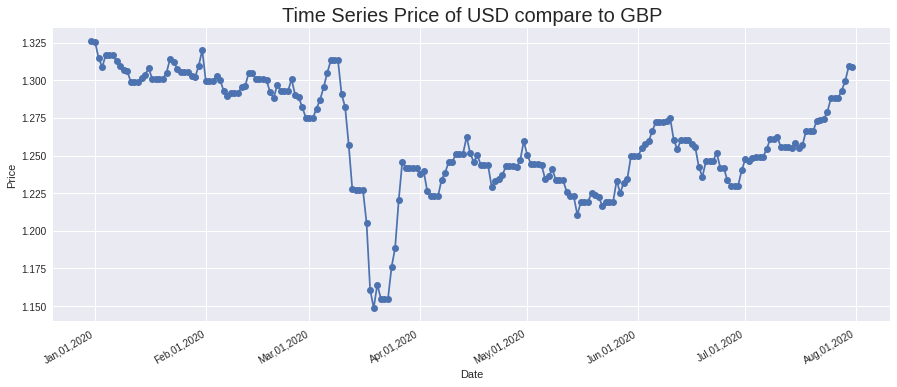

In [65]:
rcParams['figure.figsize'] = 15,6
dates = np.array(dateFormatting['new_date'])
price = np.array(dataset['Price'])
plt.plot_date(dates,price, linestyle ='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d,%Y')
plt.title(('Time Series Price of USD compare to GBP'), size = 20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(date_format)

# Split train & test set


In [66]:
# Look back leading up to the 7 days before the day we care about
look_back=7
num_samples=len(dataset)-look_back
print('Number of samples: ', num_samples)
# Get indices for new dataset
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(look_back+1).astype(np.int)
# Create the 2D matrix of training samples
data = dataset["Price"].values[indices] 
# Each row represents 7 days in the past
x = data[:,:-1] 
# Each output value represents the 8th day
y = data[:,-1] 

Number of samples:  207


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle = False)

In [68]:
x_train.shape, x_test.shape

((165, 7), (42, 7))

In [69]:
y_train.shape, y_test.shape

((165,), (42,))

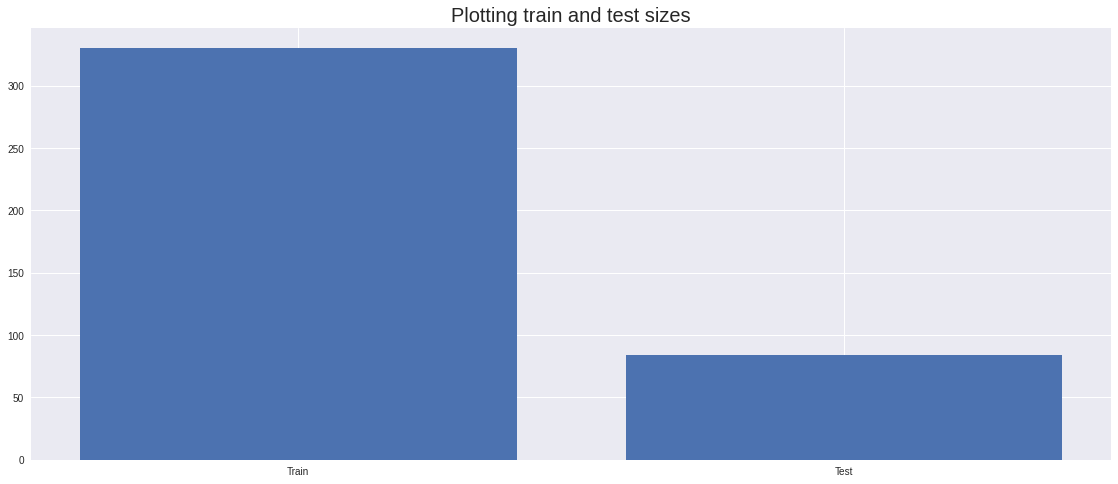

In [70]:
rcParams['figure.figsize'] = 15,6
train = len(x_train) + len(y_train)
test = len(x_test) + len(y_test)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dataset = ['Train', 'Test']
dataset_size = [train,test]
ax.bar(dataset,dataset_size)
plt.title('Plotting train and test sizes', size = 20)
plt.show()

# Detecting outliers

In [71]:
# returns anomaly score
isf = IsolationForest(n_jobs=-1, random_state=0)
isf.fit(x_train, y_train)
print(isf.score_samples(x_train))

[-0.59759516 -0.56013355 -0.51251095 -0.49281203 -0.49658599 -0.47115546
 -0.44711997 -0.42427389 -0.41042912 -0.40390405 -0.39569579 -0.39517361
 -0.39772554 -0.39424786 -0.39596602 -0.39673283 -0.4104124  -0.42965274
 -0.43356543 -0.43643412 -0.44191117 -0.42566303 -0.43652515 -0.41381684
 -0.41360043 -0.4443743  -0.46291562 -0.45092235 -0.45699996 -0.45285858
 -0.44802497 -0.45566982 -0.403455   -0.41540346 -0.42365028 -0.41647957
 -0.4216     -0.42307553 -0.42787328 -0.41936106 -0.41096798 -0.40625859
 -0.39950991 -0.39019589 -0.39282116 -0.40531672 -0.42355356 -0.42795786
 -0.4095957  -0.41613889 -0.43122755 -0.42448823 -0.42293238 -0.43645983
 -0.45256319 -0.46528817 -0.46336229 -0.4620761  -0.47649319 -0.4979071
 -0.51765257 -0.51531214 -0.50057165 -0.49515938 -0.48668347 -0.50116081
 -0.55612143 -0.59820369 -0.59272811 -0.56890131 -0.52115741 -0.50979713
 -0.55513697 -0.60324142 -0.64053771 -0.64217571 -0.64801288 -0.65903598
 -0.66617706 -0.65393678 -0.63795131 -0.65147631 -0.

In [72]:
# -1 means outlier & 1 for inliers
# Will remove the -1s
isf.predict(x_train)

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

# Modelling

In [73]:
def get_best_fit_train (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_train, label = 'y_train')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

def get_best_fit_test (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_test, label = 'y_test')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

# Performance Metric


In [74]:
def get_performance_train (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_train, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_train, model_pred).round(4))
  print('R2_Score:',r2_score(y_train, model_pred).round(4))


In [75]:
def get_performance_test (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_test, model_pred).round(4))  
  print('R2_Score:',r2_score(y_test, model_pred).round(4))


# Simple Linear Regression

In [76]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
pred_train_lr= model_lr.predict(x_train)
pred_test_lr= model_lr.predict(x_test)

Text(0.5, 1.0, 'Where Linear Regression Model Train Results Fall on Actual Spot Price')

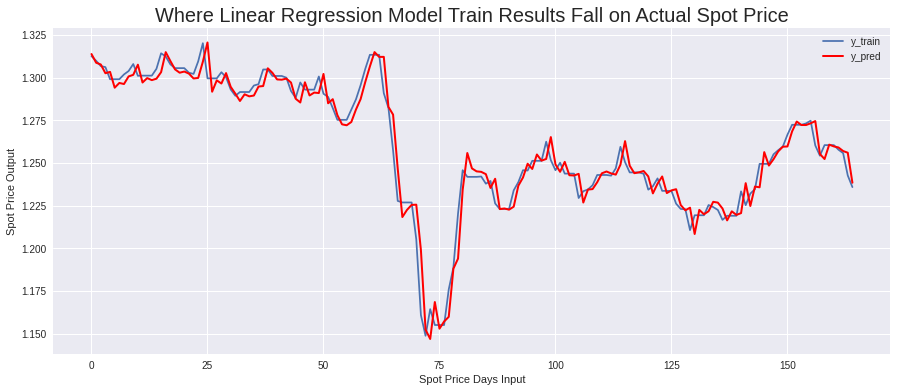

In [77]:
# pred_lr_train = (model_lr.coef_[0] * x_train) + (model_lr.coef_[1] * x_train) + (model_lr.coef_[2]* x_train) + (model_lr.coef_[3] * x_train) + (model_lr.coef_[4]* x_train) + (model_lr.coef_[5] * x_train) + (model_lr.coef_[6]* x_train) + model_lr.intercept_
get_best_fit_train(pred_train_lr)
plt.title('Where Linear Regression Model Train Results Fall on Actual Spot Price', size = 20)


Text(0.5, 1.0, 'Where Linear Regression Model Test Results Fall on Actual Spot Price')

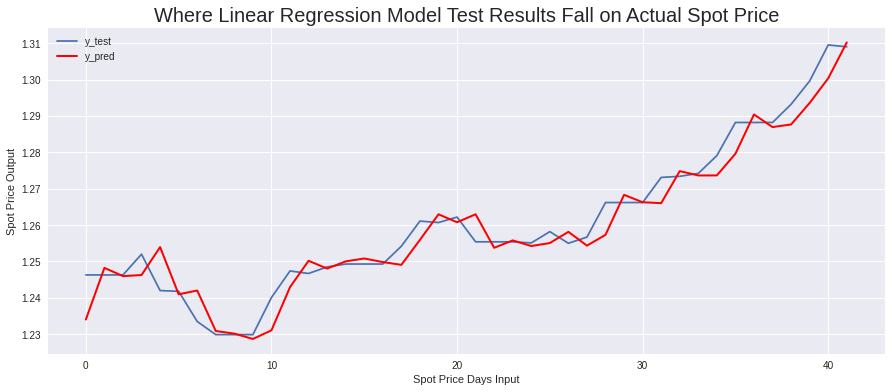

In [78]:
# pred_lr_test = (model_lr.coef_[0] * x_test) + (model_lr.coef_[1] * x_test) + (model_lr.coef_[2]* x_test) + (model_lr.coef_[3] * x_test) + (model_lr.coef_[4]* x_test) + (model_lr.coef_[5] * x_test) + (model_lr.coef_[6]* x_test) + model_lr.intercept_
get_best_fit_test(pred_test_lr)
plt.title('Where Linear Regression Model Test Results Fall on Actual Spot Price', size = 20)


In [79]:
print('Train:')
get_performance_train(pred_train_lr)
print('Test:')
get_performance_test(pred_test_lr)

Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373


## Simple Linear Regression Formula

In [80]:
slope = model_lr.coef_[6]
intercept = model_lr.intercept_
print("formula: y = {0} + {1}x".format(intercept,slope))

formula: y = 0.054265169095071064 + 1.2671184009067529x


# Support Vector Regression

In [81]:
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x_train = sc_x.fit_transform(x_train)
sc_y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [82]:
model_svr = SVR(kernel='linear') 
model_svr.fit(sc_x_train, sc_y_train)
pred_train_svr= model_svr.predict(x_train)
pred_test_svr= model_svr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Where Support Vector Regression Model Test Results Fall on Actual Spot Price')

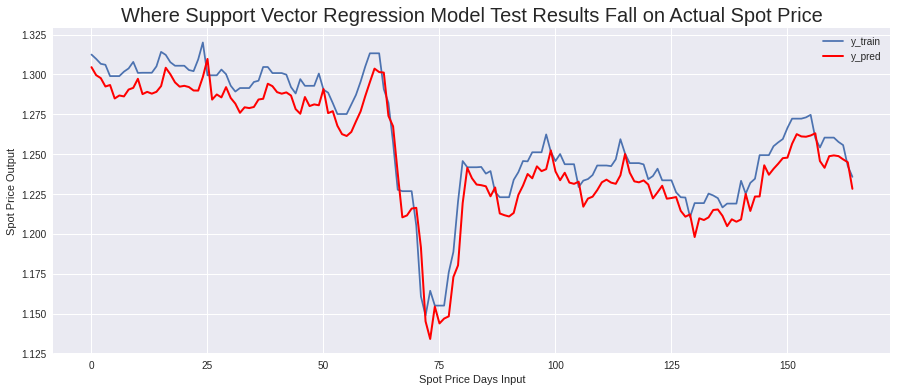

In [83]:
get_best_fit_train(pred_train_svr)
plt.title('Where Support Vector Regression Model Test Results Fall on Actual Spot Price', size = 20)



Text(0.5, 1.0, 'Where Support Vector Regression Model Test Results Fall on Actual Spot Price')

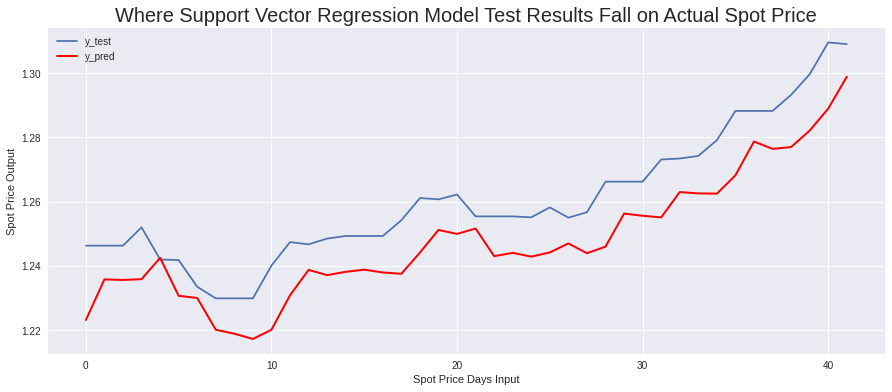

In [84]:
get_best_fit_test(pred_test_svr)
plt.title('Where Support Vector Regression Model Test Results Fall on Actual Spot Price', size = 20)


# Random Forest Regression

In [85]:
model_random_forest = RandomForestRegressor()
model_random_forest.fit(x_train, y_train)
pred_train_rf= model_random_forest.predict(x_train)
pred_test_rf= model_random_forest.predict(x_test)


Text(0.5, 1.0, 'Where Random Forest Model Train Results Fall on Actual Spot Price')

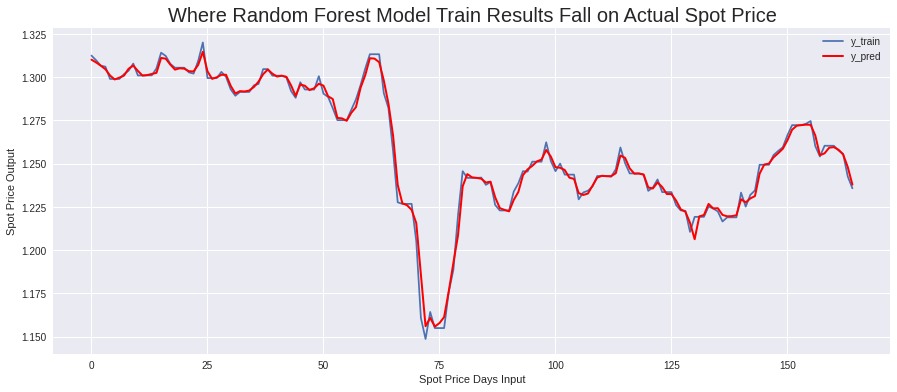

In [86]:
get_best_fit_train(pred_train_rf)
plt.title('Where Random Forest Model Train Results Fall on Actual Spot Price', size = 20)


Text(0.5, 1.0, 'Where Random Forest Model Test Results Fall on Actual Spot Price')

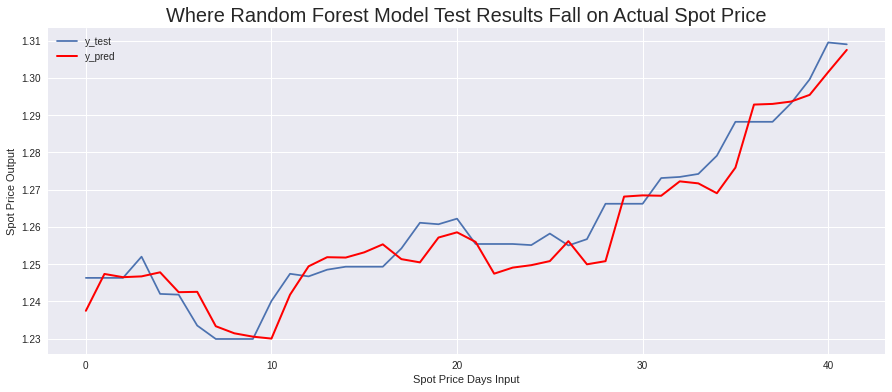

In [87]:
get_best_fit_test(pred_test_rf)
plt.title('Where Random Forest Model Test Results Fall on Actual Spot Price', size = 20)


In [88]:
print('Train:')
get_performance_train(pred_train_rf)
print('Test:')
get_performance_test(pred_test_rf)

Train:
Mean Absolute Error: 0.0023
Mean Squared Error: 0.0
R2_Score: 0.9905
Test:
Mean Absolute Error: 0.0048
Mean Squared Error: 0.0
R2_Score: 0.9127


# Gradient Boosting

In [89]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)
pred_train_gb= model_gb.predict(x_train)
pred_test_gb= model_gb.predict(x_test)


Text(0.5, 1.0, 'Where Gradient Boosting Model Train Results Fall on Actual Spot Price')

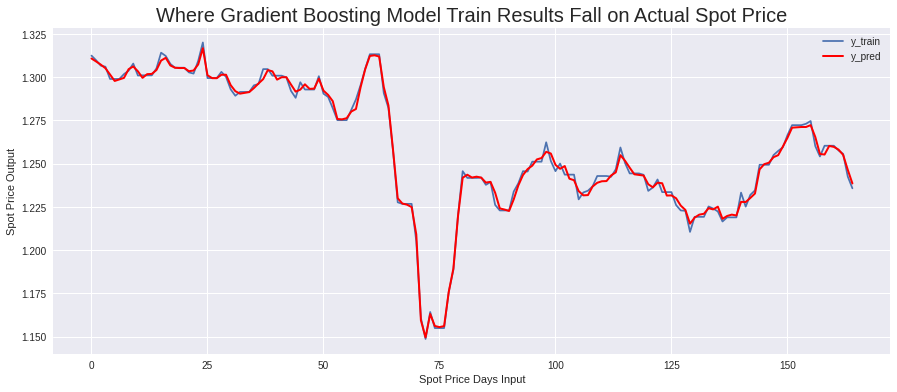

In [90]:
get_best_fit_train(pred_train_gb)
plt.title('Where Gradient Boosting Model Train Results Fall on Actual Spot Price', size = 20)


Text(0.5, 1.0, 'Where Gradient Boosting Model Test Results Fall on Actual Spot Price')

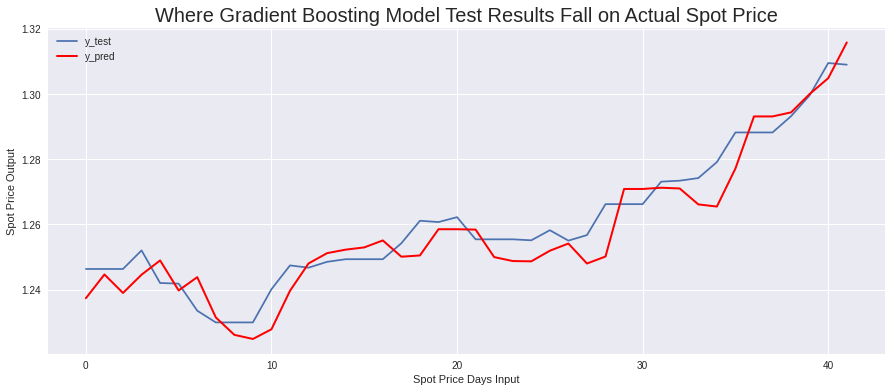

In [91]:
get_best_fit_test(pred_test_gb)
plt.title('Where Gradient Boosting Model Test Results Fall on Actual Spot Price', size = 20)


In [92]:
print('Train:')
get_performance_train(pred_train_gb)
print('Test:')
get_performance_test(pred_test_gb)

Train:
Mean Absolute Error: 0.0018
Mean Squared Error: 0.0
R2_Score: 0.9962
Test:
Mean Absolute Error: 0.0056
Mean Squared Error: 0.0
R2_Score: 0.8905


# Comparison

## Performance Metric

In [93]:
print('\nLinear Regression')
print('Train:')
get_performance_train(pred_train_lr)
print('Test:')
get_performance_test(pred_test_lr)
print('\nSupport Vector Regression')
print('Train:')
get_performance_train(pred_train_svr)
print('Test:')
get_performance_test(pred_test_svr)
print('\nRandom Forest')
print('Train:')
get_performance_train(pred_train_rf)
print('Test:')
get_performance_test(pred_test_rf)
print('\nGradient Boosting')
print('Train:')
get_performance_train(pred_train_gb)
print('Test:')
get_performance_test(pred_test_gb)


Linear Regression
Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373

Support Vector Regression
Train:
Mean Absolute Error: 0.0121
Mean Squared Error: 0.0002
R2_Score: 0.8724
Test:
Mean Absolute Error: 0.0126
Mean Squared Error: 0.0002
R2_Score: 0.5515

Random Forest
Train:
Mean Absolute Error: 0.0023
Mean Squared Error: 0.0
R2_Score: 0.9905
Test:
Mean Absolute Error: 0.0048
Mean Squared Error: 0.0
R2_Score: 0.9127

Gradient Boosting
Train:
Mean Absolute Error: 0.0018
Mean Squared Error: 0.0
R2_Score: 0.9962
Test:
Mean Absolute Error: 0.0056
Mean Squared Error: 0.0
R2_Score: 0.8905


## Visual Representation

### Train

In [94]:
compare_models_train=pd.DataFrame({
              "lr":np.absolute(y_train-pred_train_lr), 
              "svr":np.absolute(y_train-pred_train_svr),
              "rf":np.absolute(y_train-pred_train_rf),
              "gb":np.absolute(y_train-pred_train_gb)
              })

Text(0.5, 0, 'Days')

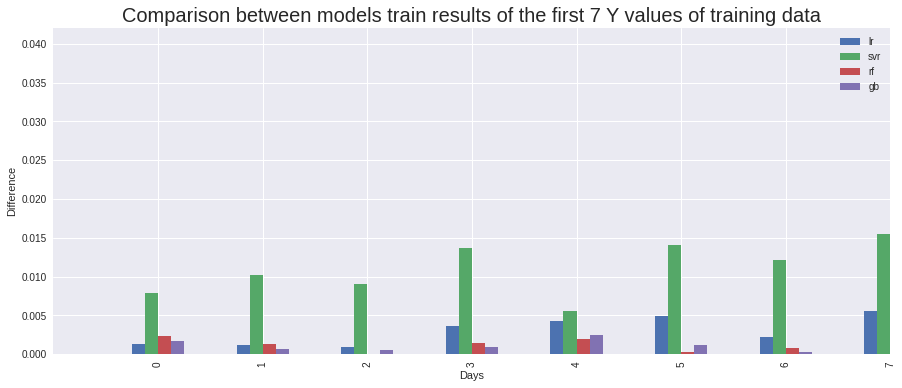

In [95]:
compare_models_train.plot.bar(figsize=(15, 6))
plt.xlim(-1,7) 
plt.title('Comparison between models train results of the first 7 Y values of training data', size = 20)
plt.ylabel('Difference')
plt.xlabel('Days')


## Test

In [96]:
compare_models_test=pd.DataFrame({
              "lr":np.absolute(y_test-pred_test_lr), 
              "svr":np.absolute(y_test-pred_test_svr),
              "rf":np.absolute(y_test-pred_test_rf),
              "gb":np.absolute(y_test-pred_test_gb)
              })

Text(0.5, 0, 'Days')

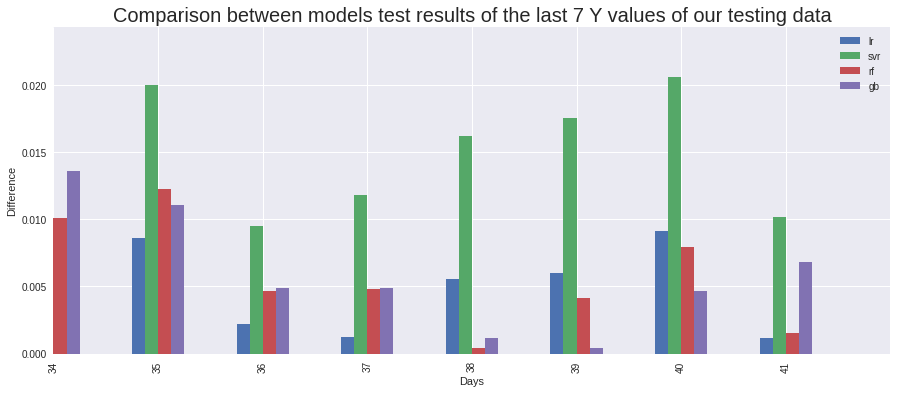

In [97]:
compare_models_test.plot.bar(figsize=(15, 6))
plt.xlim(34,42) 
plt.title('Comparison between models test results of the last 7 Y values of our testing data', size = 20)
plt.ylabel('Difference')
plt.xlabel('Days')
